# Get Citibike trip data

In [1]:
import os
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline

In [2]:
url = "https://s3.amazonaws.com/tripdata/201801_citibikenyc_tripdata.csv.zip"

In [3]:
df = pd.read_csv(url, compression='infer')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender
0,196,2018-01-01 00:01:51,2018-01-01 00:05:07,315,South St & Gouverneur Ln,40.703554,-74.006702,259,South St & Whitehall St,40.701221,-74.012342,18534,Annual Membership,Subscriber,1997.0,1
1,207,2018-01-01 00:02:44,2018-01-01 00:06:11,3224,W 13 St & Hudson St,40.739974,-74.005139,470,W 20 St & 8 Ave,40.743453,-74.000040,19651,Annual Membership,Subscriber,1978.0,1
2,613,2018-01-01 00:03:15,2018-01-01 00:13:28,386,Centre St & Worth St,40.714948,-74.002345,2008,Little West St & 1 Pl,40.705693,-74.016777,21678,Annual Membership,Subscriber,1982.0,1
3,375,2018-01-01 00:06:44,2018-01-01 00:12:59,466,W 25 St & 6 Ave,40.743954,-73.991449,325,E 19 St & 3 Ave,40.736245,-73.984738,29822,Annual Membership,Subscriber,1982.0,1
4,402,2018-01-01 00:06:57,2018-01-01 00:13:40,438,St Marks Pl & 1 Ave,40.727791,-73.985649,380,W 4 St & 7 Ave S,40.734011,-74.002939,30722,Annual Membership,Subscriber,1989.0,1


In [5]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender
718985,1134,2018-01-31 23:59:40,2018-02-01 00:18:34,3556,24 St & 41 Ave,40.752709,-73.939740,3532,Ditmars Blvd & 19 St,40.781450,-73.918330,25169,Annual Membership,Subscriber,1990.0,1
718986,352,2018-01-31 23:59:51,2018-02-01 00:05:43,483,E 12 St & 3 Ave,40.732233,-73.988900,537,Lexington Ave & E 24 St,40.740259,-73.984092,30690,Annual Membership,Subscriber,1998.0,1
718987,529,2018-01-31 23:59:52,2018-02-01 00:08:42,449,W 52 St & 9 Ave,40.764618,-73.987895,490,8 Ave & W 33 St,40.751551,-73.993934,16861,$25 Off Annual Membership,Subscriber,1969.0,1
718988,669,2018-01-31 23:59:54,2018-02-01 00:11:03,3146,E 81 St & 3 Ave,40.775730,-73.956753,3141,1 Ave & E 68 St,40.765005,-73.958185,26831,Annual Membership,Subscriber,1962.0,1
718989,206,2018-01-31 23:59:55,2018-02-01 00:03:22,310,State St & Smith St,40.689269,-73.989129,3455,Schermerhorn St & 3 Ave,40.686808,-73.980362,21444,Annual Membership,Subscriber,1988.0,1


# Wrangle the data

In [6]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
df['starthour'] = df['starttime'].dt.floor('h')
df['stophour'] = df['stoptime'].dt.floor('h')

In [7]:
df['trajectory'] = df[['start station id', 'end station id']].apply(tuple, axis=1).astype(str)

In [8]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender,starthour,stophour,trajectory
0,196,2018-01-01 00:01:51,2018-01-01 00:05:07,315,South St & Gouverneur Ln,40.703554,-74.006702,259,South St & Whitehall St,40.701221,-74.012342,18534,Annual Membership,Subscriber,1997.0,1,2018-01-01,2018-01-01,"(315, 259)"
1,207,2018-01-01 00:02:44,2018-01-01 00:06:11,3224,W 13 St & Hudson St,40.739974,-74.005139,470,W 20 St & 8 Ave,40.743453,-74.000040,19651,Annual Membership,Subscriber,1978.0,1,2018-01-01,2018-01-01,"(3224, 470)"
2,613,2018-01-01 00:03:15,2018-01-01 00:13:28,386,Centre St & Worth St,40.714948,-74.002345,2008,Little West St & 1 Pl,40.705693,-74.016777,21678,Annual Membership,Subscriber,1982.0,1,2018-01-01,2018-01-01,"(386, 2008)"
3,375,2018-01-01 00:06:44,2018-01-01 00:12:59,466,W 25 St & 6 Ave,40.743954,-73.991449,325,E 19 St & 3 Ave,40.736245,-73.984738,29822,Annual Membership,Subscriber,1982.0,1,2018-01-01,2018-01-01,"(466, 325)"
4,402,2018-01-01 00:06:57,2018-01-01 00:13:40,438,St Marks Pl & 1 Ave,40.727791,-73.985649,380,W 4 St & 7 Ave S,40.734011,-74.002939,30722,Annual Membership,Subscriber,1989.0,1,2018-01-01,2018-01-01,"(438, 380)"


# Generate table of hourly volumes (by starttime)

In [9]:
hourly_summary = pd.DataFrame()

In [10]:
hourly_summary = df.resample('H', on='starttime').count()[['tripduration']]
hourly_summary.columns = ['trips']

In [11]:
hourly_summary.head()

,trips
starttime,
2018-01-01 00:00:00,119
2018-01-01 01:00:00,168
2018-01-01 02:00:00,98
2018-01-01 03:00:00,72
2018-01-01 04:00:00,34


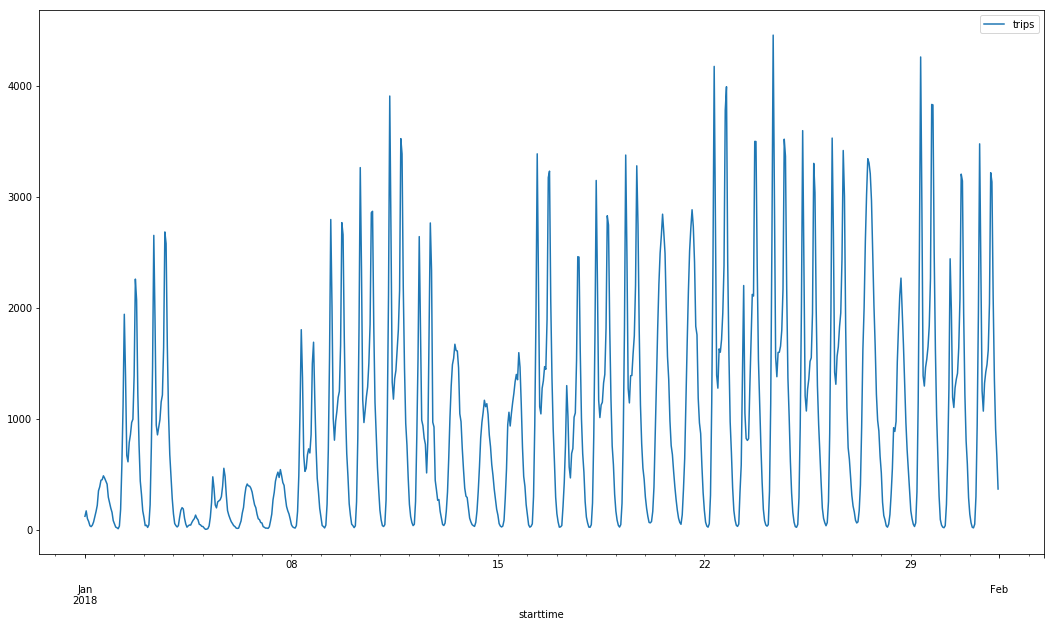

In [12]:
hourly_summary.plot(figsize=(18,10));

In [13]:
min_hour = hourly_summary.index.min()
max_hour = hourly_summary.index.max()
hour_range = pd.date_range(hourly_summary.index.min(), hourly_summary.index.max(), freq='H')

# Generate table of hourly volumes for every origin->destination stop pair

In [14]:
%%time
trip_volumes = df.groupby(by=['starthour','start station id', 'end station id', "trajectory"]).count()[['tripduration']]
trip_volumes.columns = ['volume']
trip_volumes = pd.DataFrame(trip_volumes.to_records())
trip_volumes.index = trip_volumes['trajectory']

CPU times: user 2.98 s, sys: 400 ms, total: 3.38 s
Wall time: 3.39 s


In [15]:
max(trip_volumes['volume'])

15

In [16]:
trip_volumes.head()

,starthour,start station id,end station id,trajectory,volume
trajectory,,,,,
"(128, 382)",2018-01-01,128,382,"(128, 382)",1
"(146, 249)",2018-01-01,146,249,"(146, 249)",1
"(161, 439)",2018-01-01,161,439,"(161, 439)",1
"(238, 461)",2018-01-01,238,461,"(238, 461)",1
"(238, 494)",2018-01-01,238,494,"(238, 494)",1


In [17]:
trajectories = np.unique(trip_volumes['trajectory'])

In [18]:
len(trajectories)

108324

In [ ]:
trajectories[0]

'(119, 119)'

In [ ]:
results = []
for i in tqdm(trajectories):
    subset = trip_volumes.loc[[i]].copy()
    hourly = subset.resample('H', on='starthour').sum()[['volume']].reindex(hour_range).fillna(0)
    hourly['trajectory'] = i
    hourly['volume_t-1'] = hourly['volume'].shift(1)
    hourly['volume_t-2'] = hourly['volume'].shift(2)
    hourly['volume_t-3'] = hourly['volume'].shift(3)
    hourly['volume_t-4'] = hourly['volume'].shift(4)
    hourly['volume_t-5'] = hourly['volume'].shift(5)
    hourly['volume_t-6'] = hourly['volume'].shift(6)
    hourly['volume_t-7'] = hourly['volume'].shift(7)
    hourly['volume_t-8'] = hourly['volume'].shift(8)
    hourly['volume_t-9'] = hourly['volume'].shift(9)
    hourly['volume_t-10'] = hourly['volume'].shift(10)
    hourly['volume_t-11'] = hourly['volume'].shift(11)
    hourly['volume_t-12'] = hourly['volume'].shift(12)
    hourly['volume_t-13'] = hourly['volume'].shift(13)
    hourly['volume_t-14'] = hourly['volume'].shift(14)
    hourly['volume_t-15'] = hourly['volume'].shift(15)
    hourly['volume_t-16'] = hourly['volume'].shift(16)
    hourly['volume_t-17'] = hourly['volume'].shift(17)
    hourly['volume_t-18'] = hourly['volume'].shift(18)
    hourly['volume_t-19'] = hourly['volume'].shift(19)
    hourly['volume_t-20'] = hourly['volume'].shift(20)
    hourly['volume_t-21'] = hourly['volume'].shift(21)
    hourly['volume_t-22'] = hourly['volume'].shift(22)
    hourly['volume_t-23'] = hourly['volume'].shift(23)
    hourly['volume_t-24'] = hourly['volume'].shift(24)
    hourly = hourly.dropna()
    results.append(hourly)

  5%|▍         | 4898/108324 [03:32<1:14:47, 23.05it/s]

In [ ]:
%%time
output = pd.concat(results)

In [ ]:
output.shape

In [ ]:
output.head()

In [ ]:
output.tail()

In [ ]:
%%time
output.to_csv("training_data.csv")

In [ ]:
%%time
#output.to_csv("hourly_trajectories.csv")

# Get list of Citibike stations

In [224]:
stations_url = "https://feeds.citibikenyc.com/stations/stations.json"
stations_response = requests.get(stations_url)
stations_json = stations_response.json()

In [225]:
station_ids = []
station_lats = []
station_lons = []
station_names = []
station_test = []
station_docks = []

for i in stations_json['stationBeanList']:
    station_ids.append(i['id'])
    station_lats.append(i['latitude'])
    station_lons.append(i['longitude'])
    station_names.append(i['stationName'])
    station_test.append(i['testStation'])
    station_docks.append(i['totalDocks'])
    
stations = pd.DataFrame()
stations['id'] = station_ids
stations['latitude'] = station_lats
stations['longitude'] = station_lons
stations['name'] = station_names
stations['test'] = station_test
stations['docks'] = station_docks

stations.sort_values(by='id', inplace=True)
stations.index=stations['id']
del stations['id']

In [226]:
stations.head()

,latitude,longitude,name,test,docks
id,,,,,
72,40.767272,-73.993929,W 52 St & 11 Ave,False,39
79,40.719116,-74.006667,Franklin St & W Broadway,False,33
82,40.711174,-74.000165,St James Pl & Pearl St,False,27
83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,False,62
119,40.696089,-73.978034,Park Ave & St Edwards St,False,19
